In [85]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [86]:
cols=['fLength','fWidth','fSize','fConc', 'fConc1', 'fAsym', 'fM3long', 'fM3trans', 'fAlpha', 'fDist', 'class']
df=pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3long  fM3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [87]:
df['class']=(df['class']=='g').astype(int)

In [88]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3long  fM3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

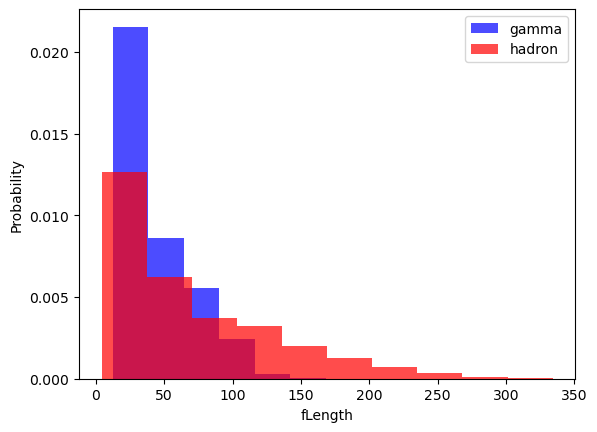

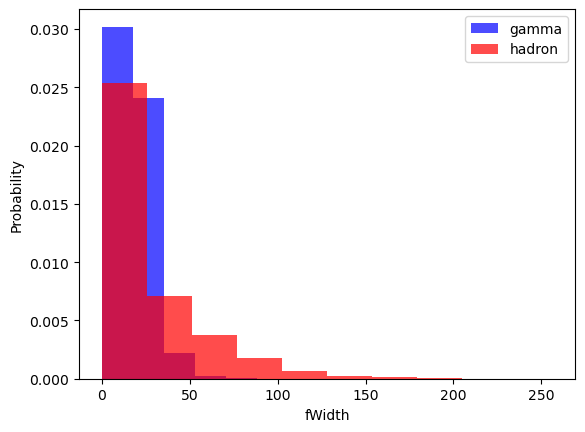

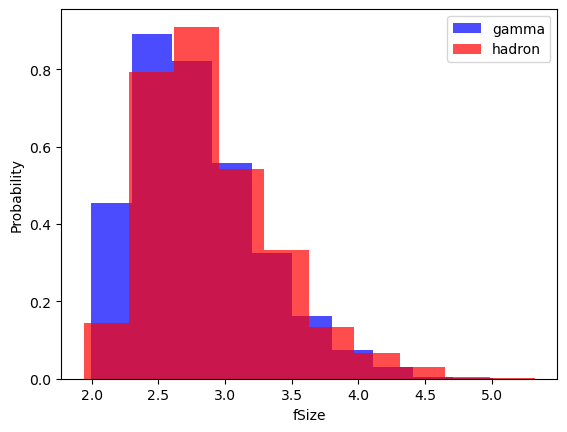

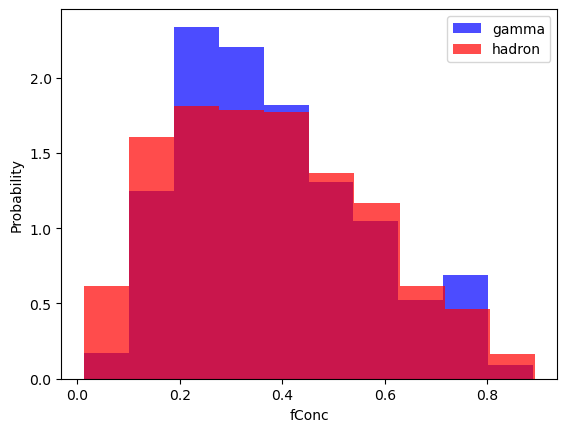

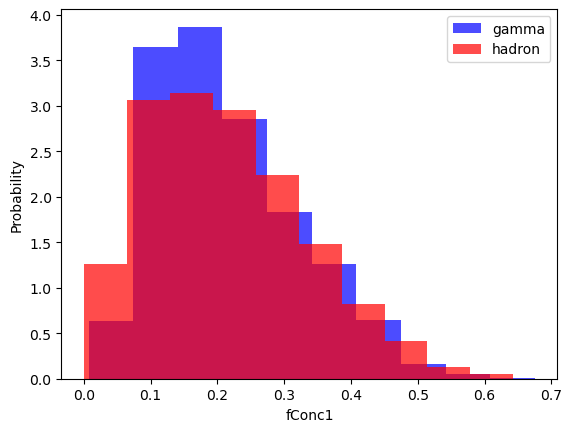

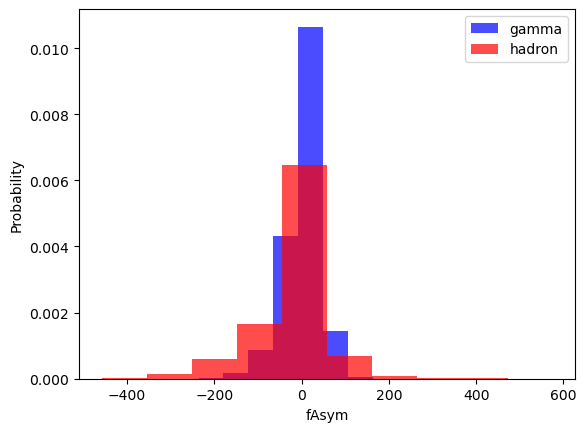

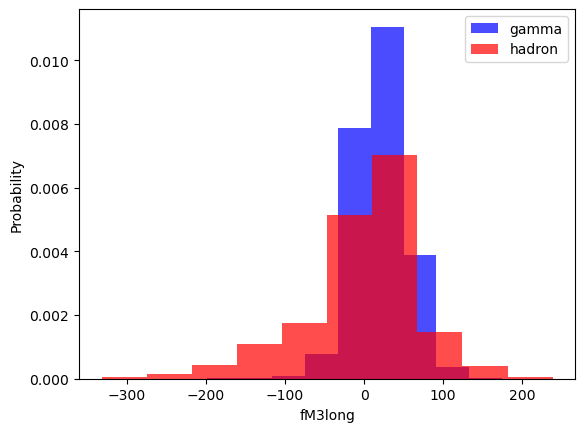

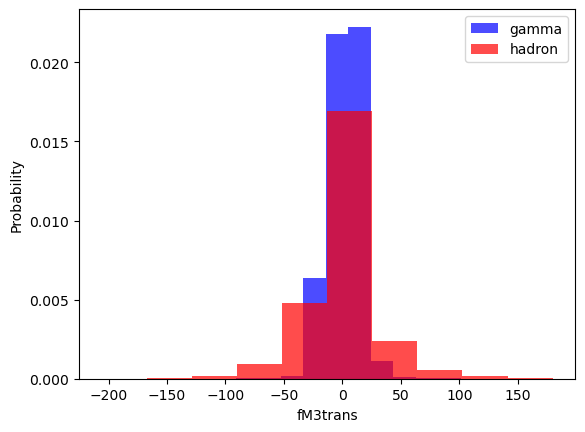

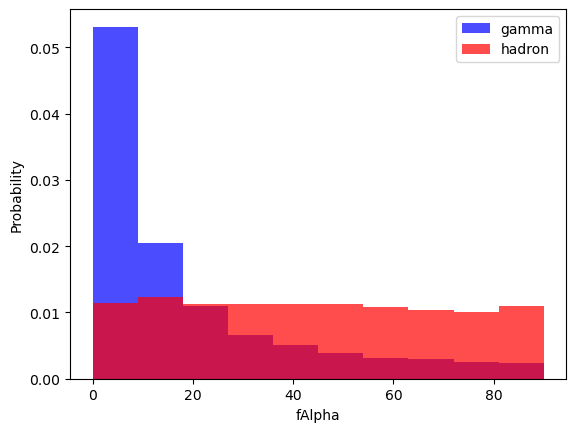

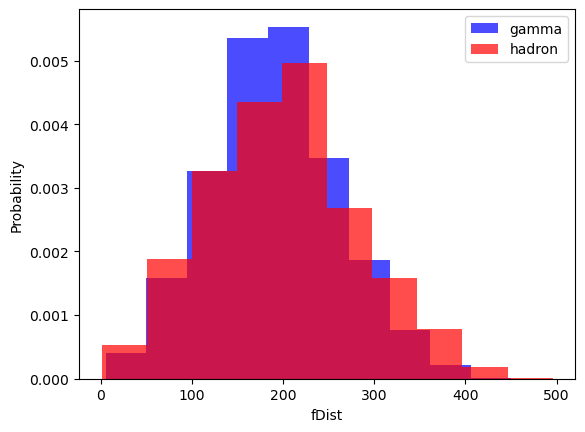

In [89]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7,density=True)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [52]:
#Train, Validation and Test datasets

In [90]:
train, valid, test=np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [91]:
#Scaling the data

In [92]:
def scale_dataset(dataframe, oversample=False):
    X=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values

    scaler=StandardScaler()
    X=scaler.fit_transform(X)
    
    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(X,y) #to make an equal number of samples from gamma and hadron classes
        
    data=np.hstack((X,np.reshape(y, (-1,1)))) #-1 equals saying len(y)
    
    return data, X,y

In [56]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0])) #hadron

7485
3927


In [93]:
train, X_train, y_train=scale_dataset(train, oversample=True)
valid, X_valid, y_valid=scale_dataset(valid, oversample=False)
test, X_test, y_test=scale_dataset(test, oversample=False)

In [58]:
# k-Nearest Neighbors

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [60]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [61]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_pred=knn_model.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1388
           1       0.85      0.86      0.85      2416

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



In [20]:
# Naive Bayes: assuming that all features are indipendent
# P(Ck|x1,x2,...,xn) proportional to P(ck)*P(x1|Ck)*P(x2|Ck)*...*P(xn|Ck)
# we want to find the k category that makes the probability the highest possible
# MAP: Maximum A Posteriori

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_model=GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.50      1300
           1       0.74      0.91      0.82      2504

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



In [24]:
# simple and multiple (features) logistic regression
#P=1/(1+e^-(mx+b))
#S(mx+b) sigmoid function

In [25]:
from sklearn.linear_model import LogisticRegression

In [29]:
lg_model=LogisticRegression()  #we can change penalties, i.e. in this case we use l2 penalty which penalisies a lot outliers
lg_model=lg_model.fit(X_train, y_train)

In [30]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1284
           1       0.86      0.81      0.83      2520

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [31]:
# Support vector machines (SVM)
# we want to find the best hyperplane that differientiate these classes, and that has the highest margin
#x->(x,x^2) the kernel trick

In [32]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model=svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1284
           1       0.90      0.87      0.89      2520

    accuracy                           0.85      3804
   macro avg       0.83      0.84      0.84      3804
weighted avg       0.86      0.85      0.85      3804



In [33]:
#Neural Network

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
def plot_history(history):
    fig, (ax1, ax2)=plt.subplots(1,2)
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)
    
    plt.show()

    

In [103]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs, X_valid, y_valid):
    nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    valid=(X_valid, y_valid)
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history=nn_model.fit(
    X_train, y_train,epochs=epochs, batch_size=batch_size, validation_data=valid, verbose=0)
    
    return nn_model, history

16 modes, dropout 0, lr 0.1, batch size 32


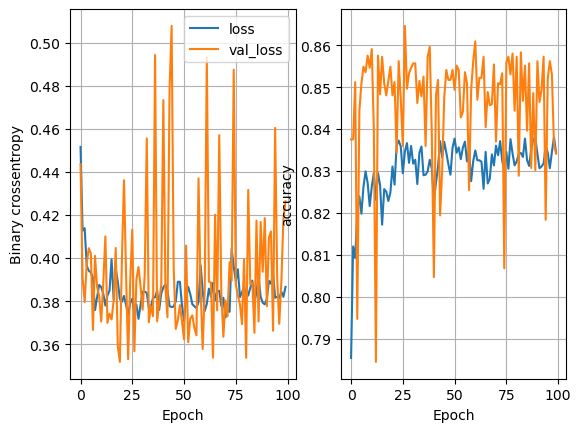

119/119 [==============================] - 0s 643us/step - loss: 0.4263 - accuracy: 0.8341
16 modes, dropout 0, lr 0.1, batch size 64


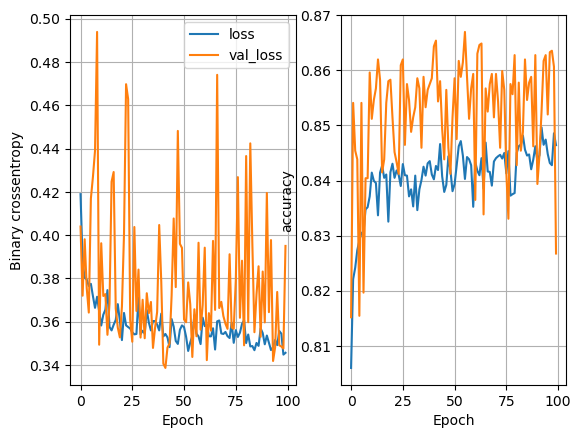

119/119 [==============================] - 0s 715us/step - loss: 0.3950 - accuracy: 0.8268
16 modes, dropout 0, lr 0.1, batch size 128


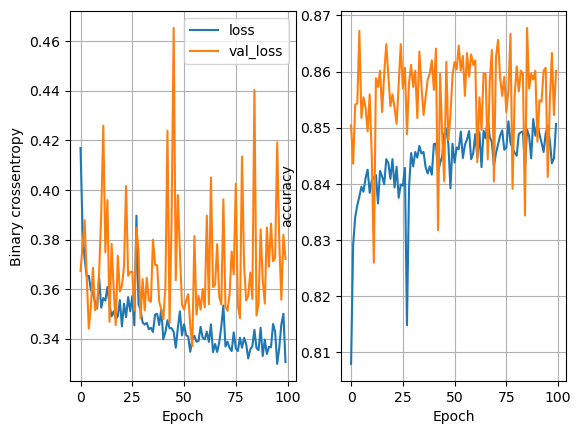

119/119 [==============================] - 0s 690us/step - loss: 0.3722 - accuracy: 0.8601
16 modes, dropout 0, lr 0.005, batch size 32


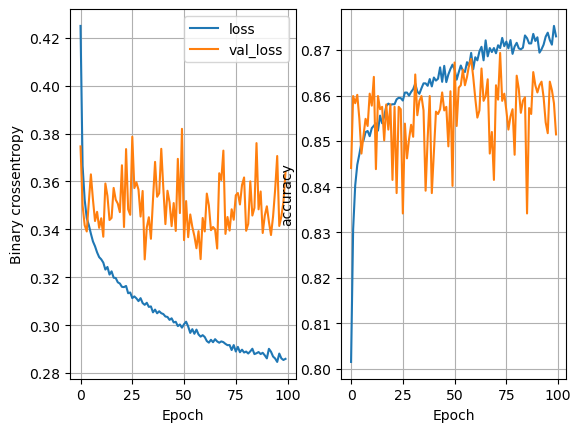

119/119 [==============================] - 0s 797us/step - loss: 0.3638 - accuracy: 0.8515
16 modes, dropout 0, lr 0.005, batch size 64


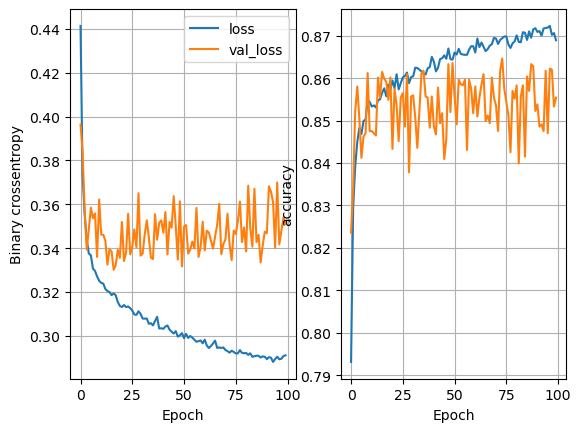

119/119 [==============================] - 0s 687us/step - loss: 0.3509 - accuracy: 0.8554
16 modes, dropout 0, lr 0.005, batch size 128


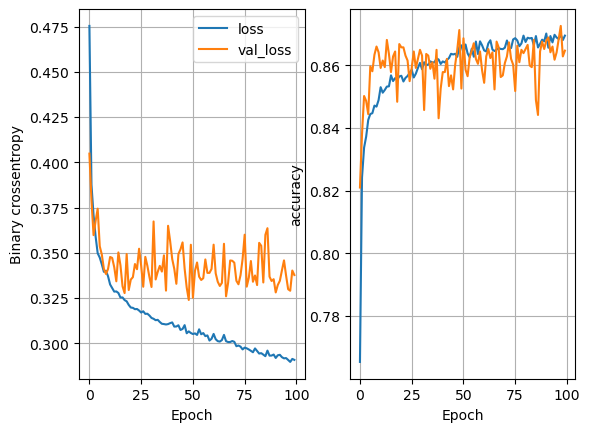

119/119 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8646
16 modes, dropout 0, lr 0.001, batch size 32


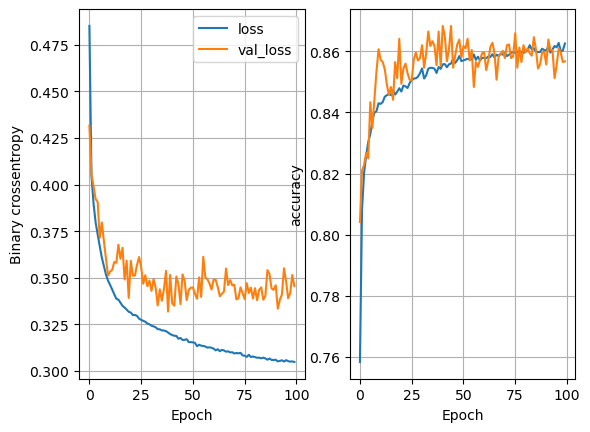

119/119 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8567
16 modes, dropout 0, lr 0.001, batch size 64


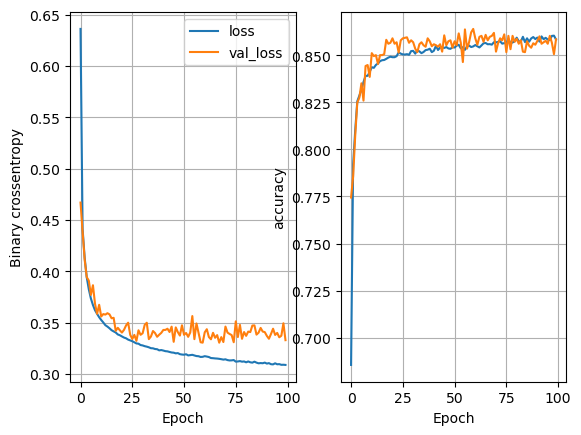

119/119 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8586
16 modes, dropout 0, lr 0.001, batch size 128


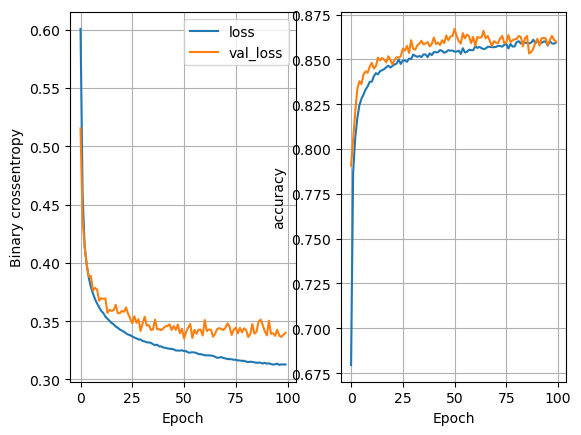

119/119 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8599
16 modes, dropout 0.2, lr 0.1, batch size 32


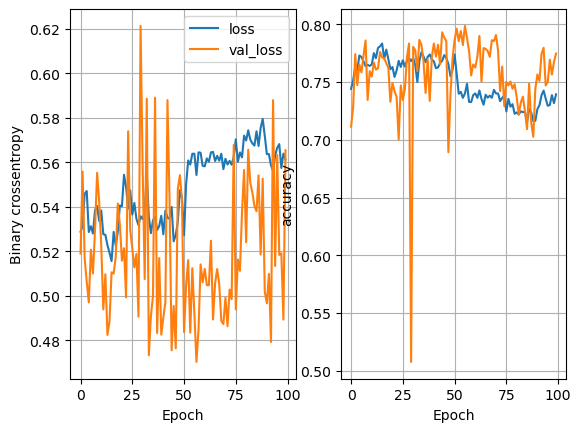

119/119 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7747
16 modes, dropout 0.2, lr 0.1, batch size 64


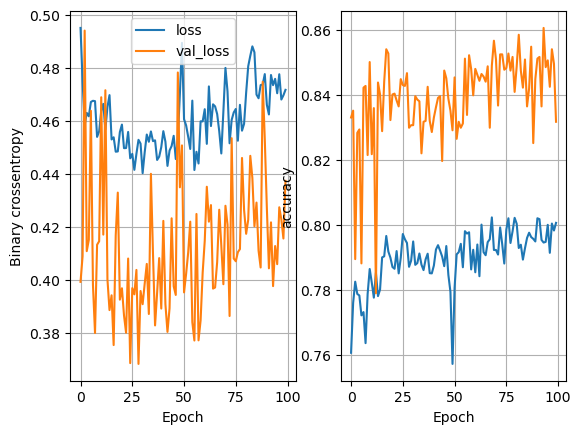

119/119 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8318
16 modes, dropout 0.2, lr 0.1, batch size 128


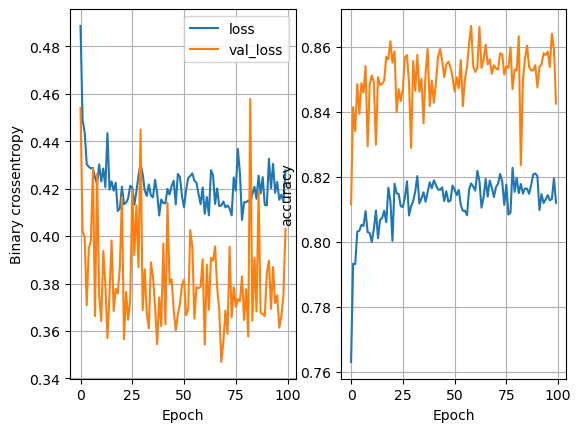

119/119 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8425
16 modes, dropout 0.2, lr 0.005, batch size 32


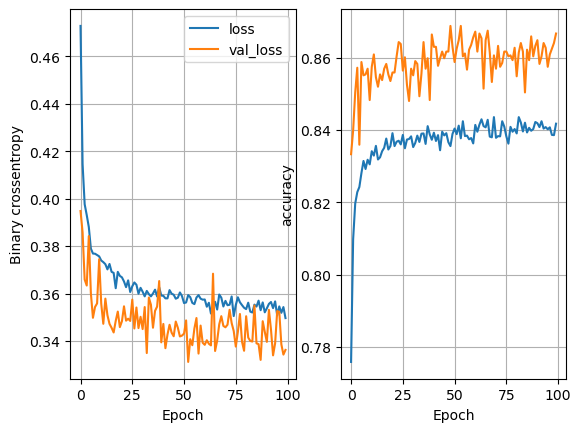

119/119 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8667
16 modes, dropout 0.2, lr 0.005, batch size 64


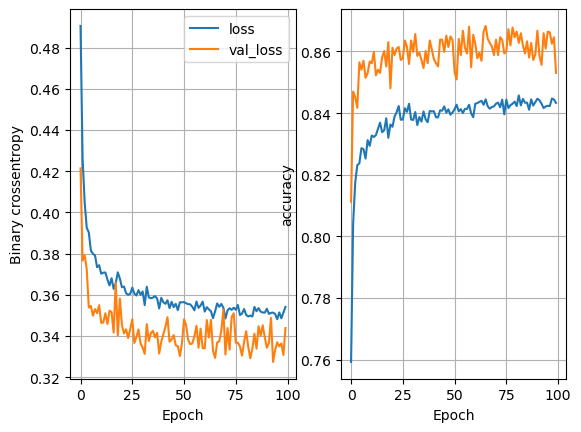

119/119 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8530
16 modes, dropout 0.2, lr 0.005, batch size 128


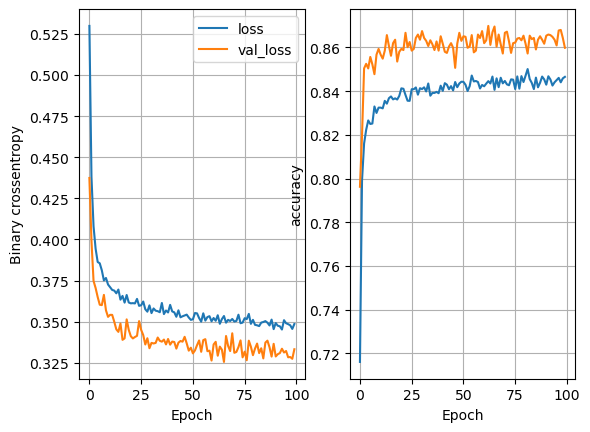

119/119 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8599
16 modes, dropout 0.2, lr 0.001, batch size 32


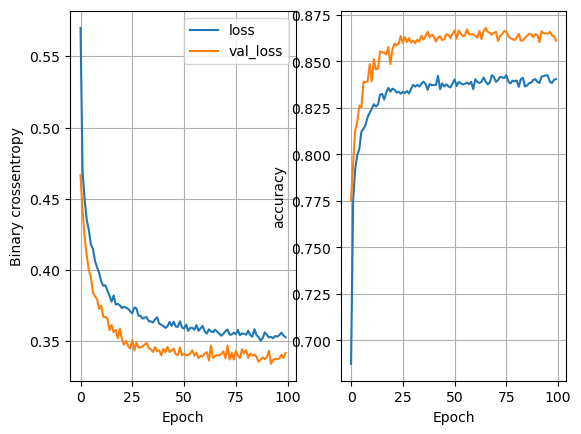

119/119 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8612
16 modes, dropout 0.2, lr 0.001, batch size 64


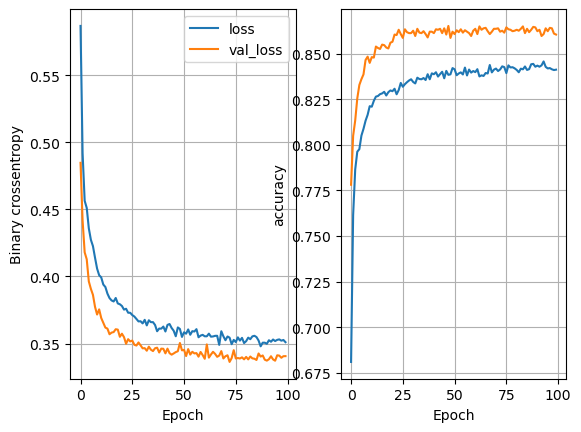

119/119 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8604
16 modes, dropout 0.2, lr 0.001, batch size 128


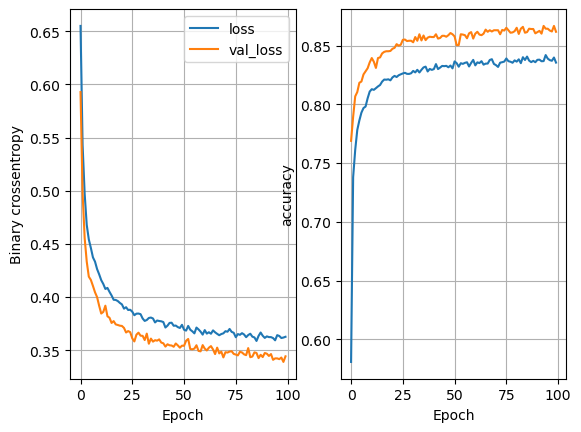

119/119 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8617
32 modes, dropout 0, lr 0.1, batch size 32


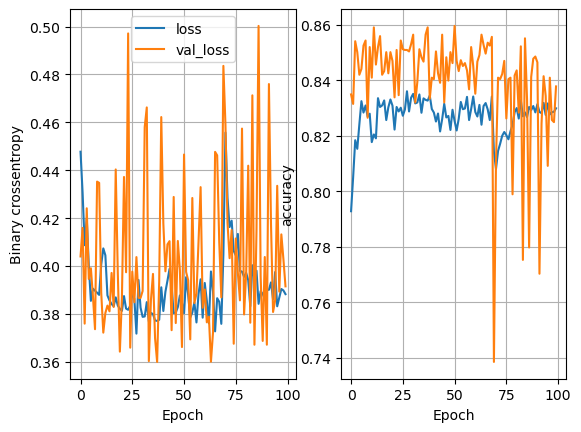

119/119 [==============================] - 0s 4ms/step - loss: 0.3915 - accuracy: 0.8378
32 modes, dropout 0, lr 0.1, batch size 64


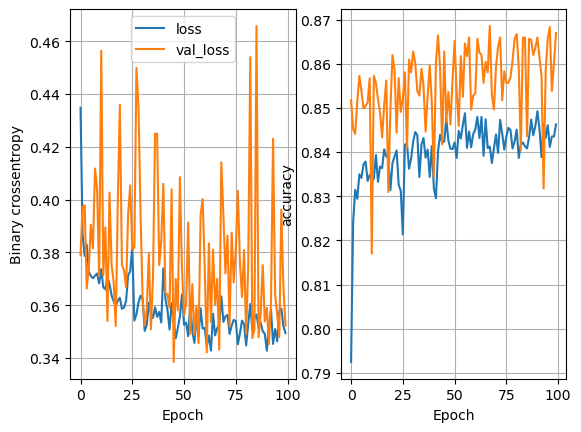

119/119 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.8670
32 modes, dropout 0, lr 0.1, batch size 128


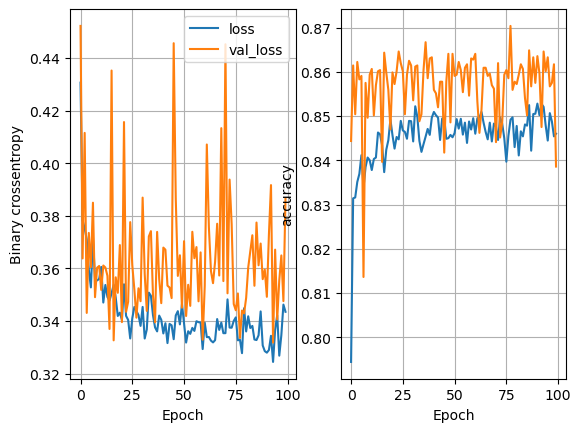

119/119 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8386
32 modes, dropout 0, lr 0.005, batch size 32


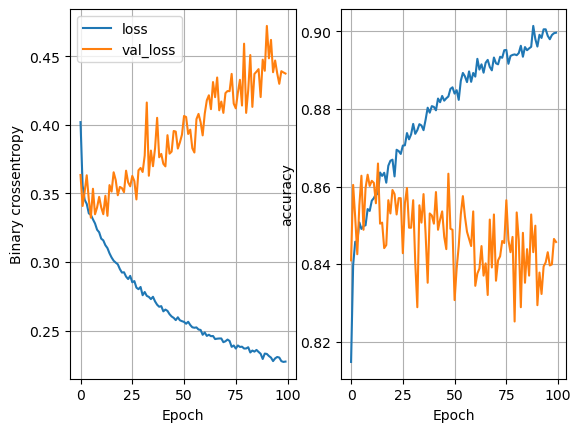

119/119 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8457
32 modes, dropout 0, lr 0.005, batch size 64


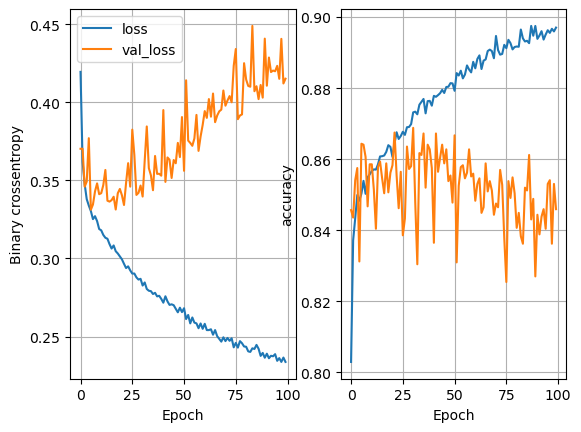

119/119 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8460
32 modes, dropout 0, lr 0.005, batch size 128


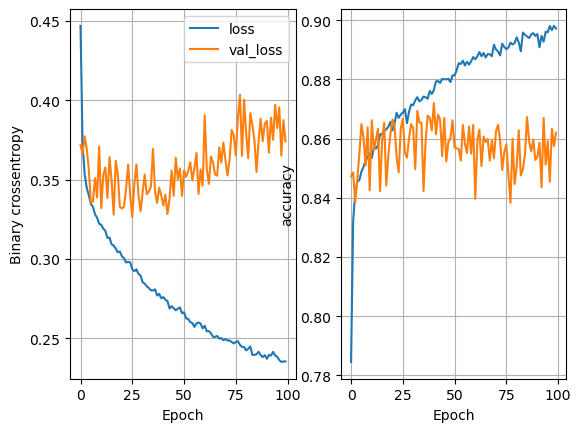

119/119 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8620
32 modes, dropout 0, lr 0.001, batch size 32


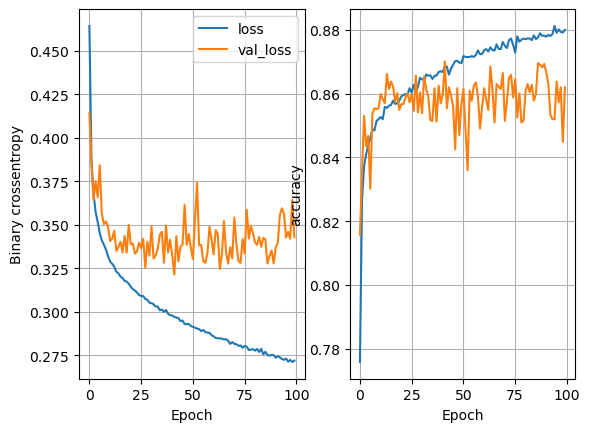

119/119 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8620
32 modes, dropout 0, lr 0.001, batch size 64


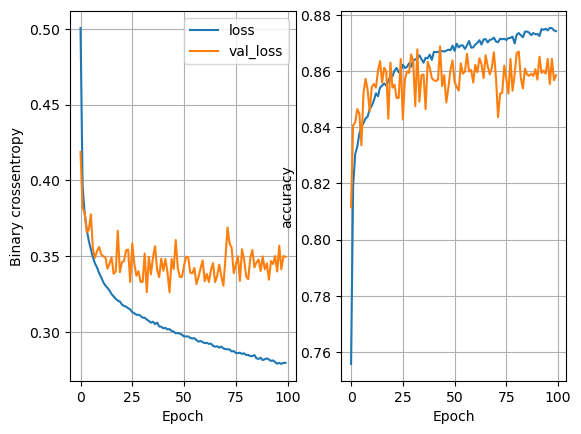

119/119 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8586
32 modes, dropout 0, lr 0.001, batch size 128


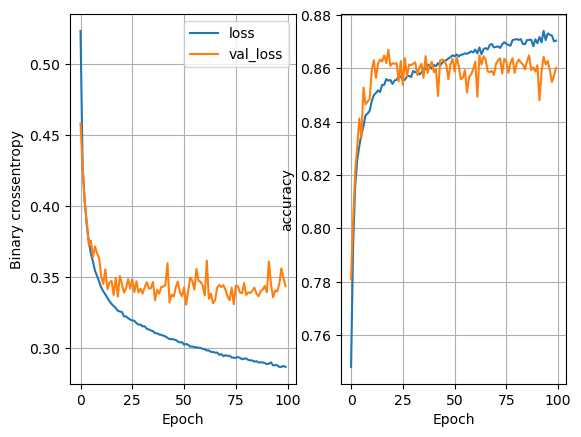

119/119 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8601
32 modes, dropout 0.2, lr 0.1, batch size 32


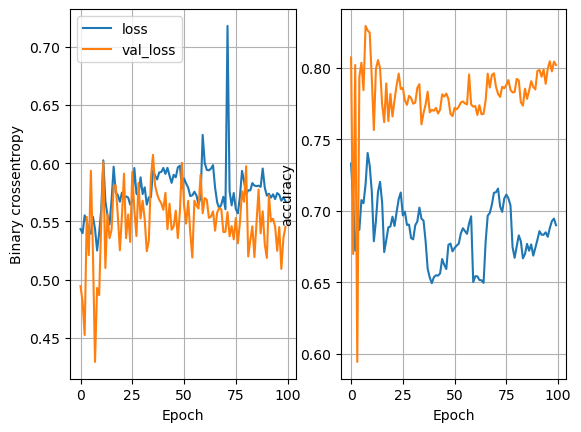

119/119 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.8021
32 modes, dropout 0.2, lr 0.1, batch size 64


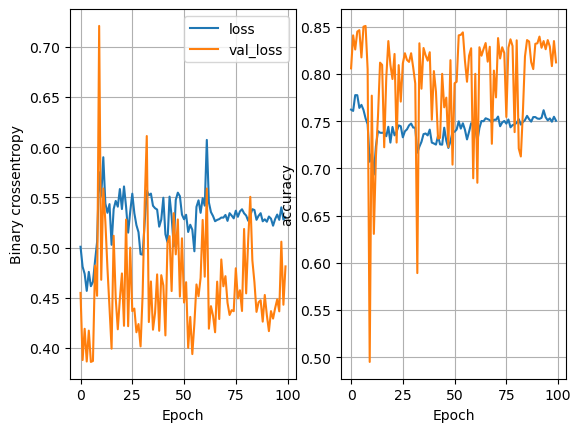

119/119 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.8123
32 modes, dropout 0.2, lr 0.1, batch size 128


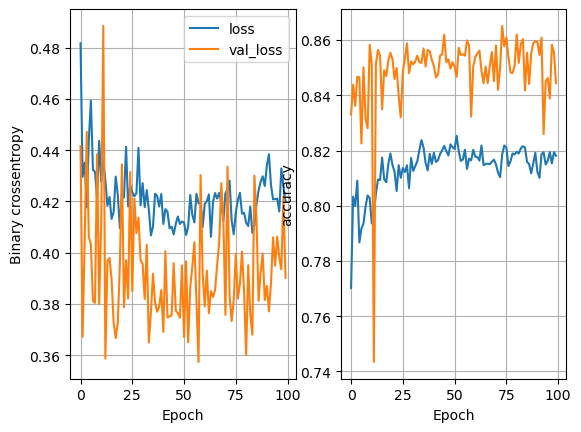

119/119 [==============================] - 0s 3ms/step - loss: 0.3902 - accuracy: 0.8444
32 modes, dropout 0.2, lr 0.005, batch size 32


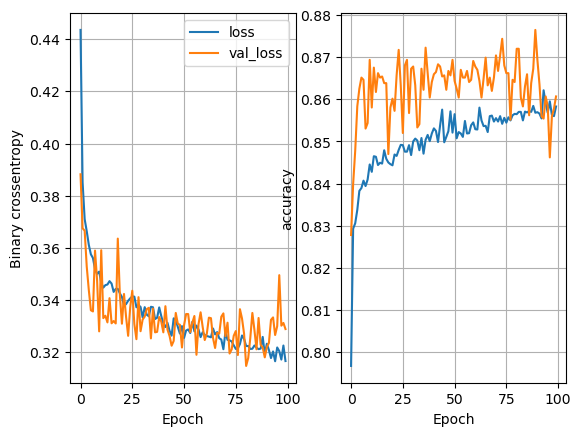

119/119 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8607
32 modes, dropout 0.2, lr 0.005, batch size 64


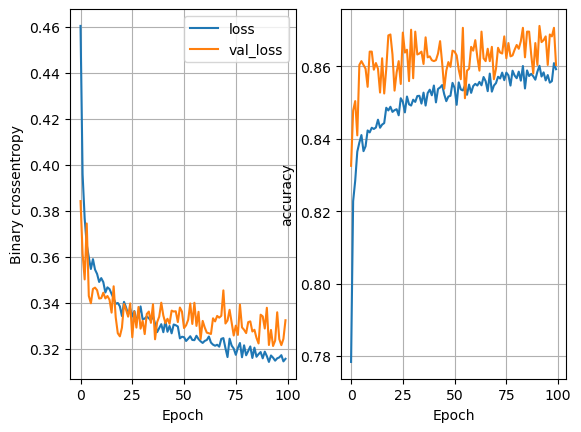

119/119 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8604
32 modes, dropout 0.2, lr 0.005, batch size 128


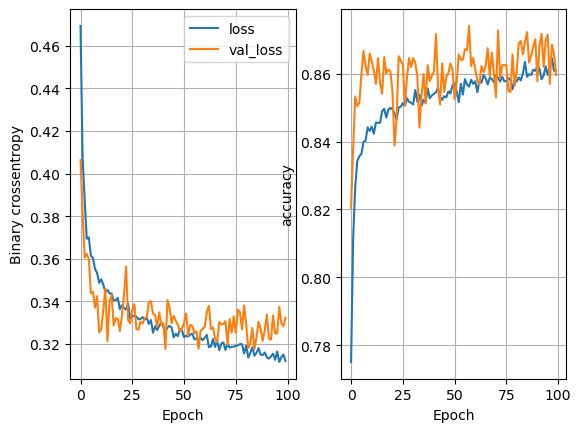

119/119 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8596
32 modes, dropout 0.2, lr 0.001, batch size 32


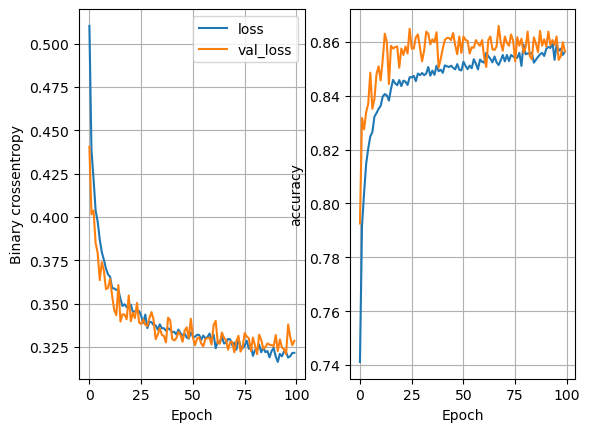

119/119 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8565
32 modes, dropout 0.2, lr 0.001, batch size 64


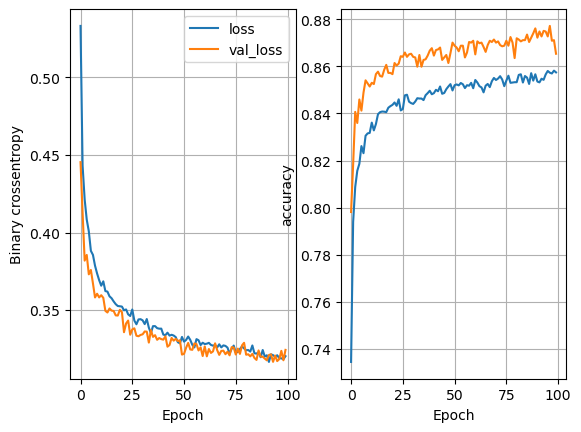

119/119 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8654
32 modes, dropout 0.2, lr 0.001, batch size 128


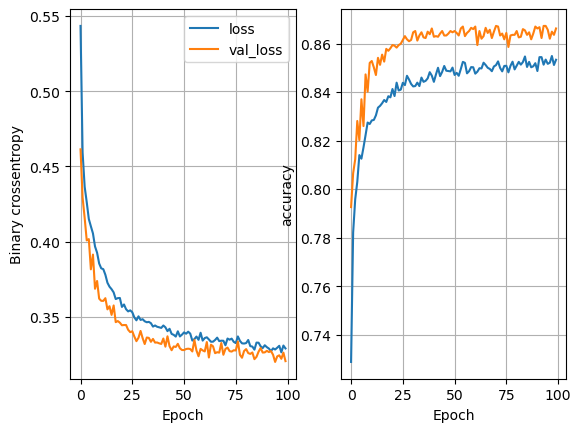

119/119 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.8662
64 modes, dropout 0, lr 0.1, batch size 32


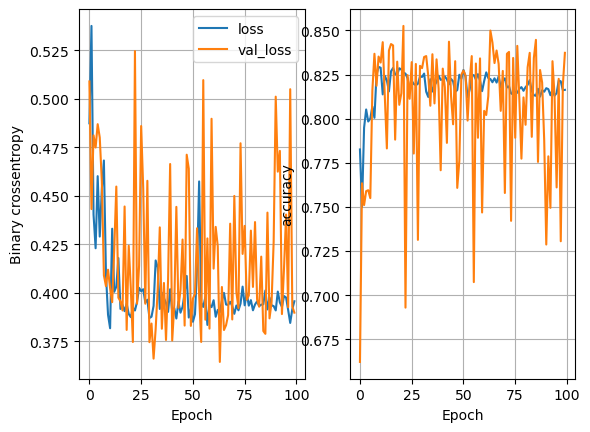

119/119 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8373
64 modes, dropout 0, lr 0.1, batch size 64


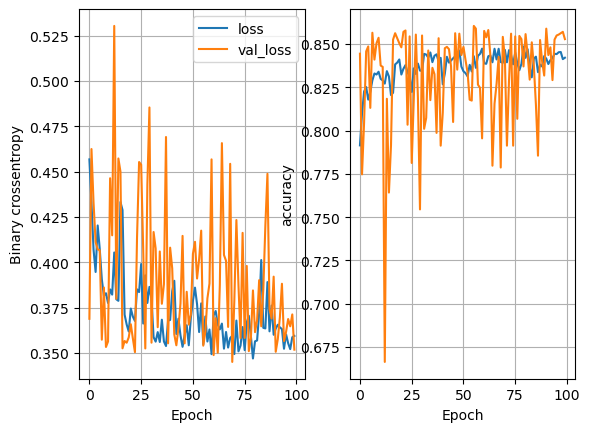

119/119 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8528
64 modes, dropout 0, lr 0.1, batch size 128


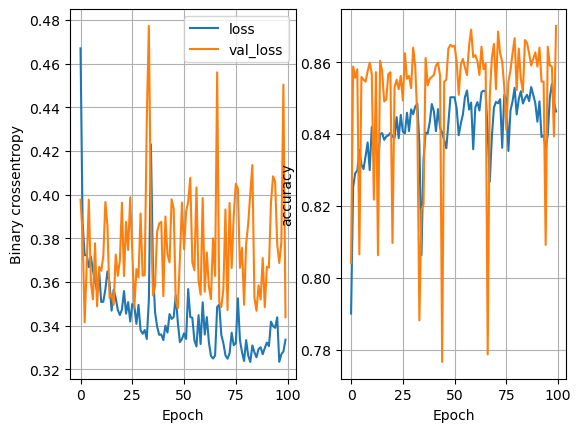

119/119 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8701
64 modes, dropout 0, lr 0.005, batch size 32


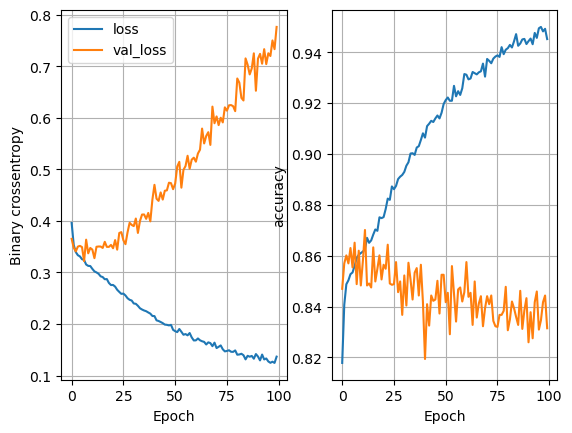

119/119 [==============================] - 0s 3ms/step - loss: 0.7764 - accuracy: 0.8315
64 modes, dropout 0, lr 0.005, batch size 64


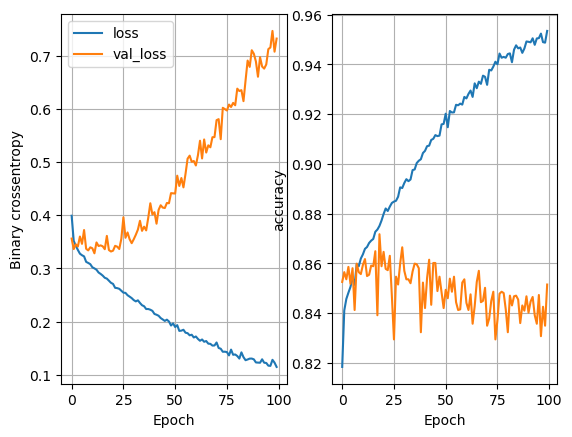

119/119 [==============================] - 0s 3ms/step - loss: 0.7320 - accuracy: 0.8515
64 modes, dropout 0, lr 0.005, batch size 128


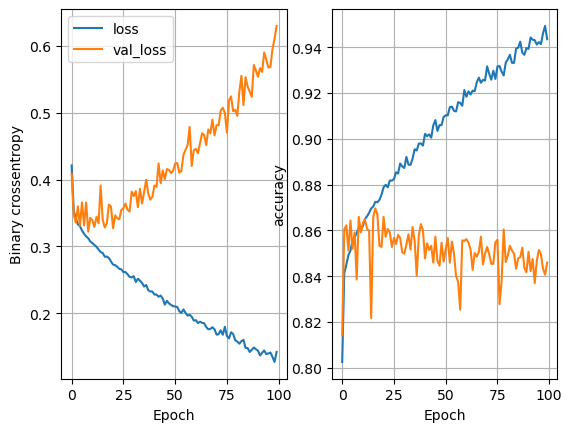

119/119 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.8460
64 modes, dropout 0, lr 0.001, batch size 32


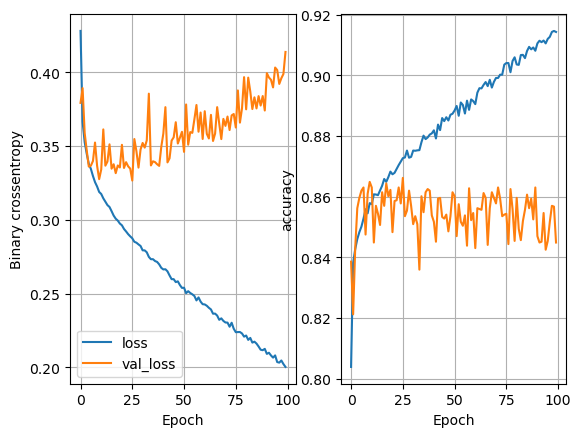

119/119 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8449
64 modes, dropout 0, lr 0.001, batch size 64


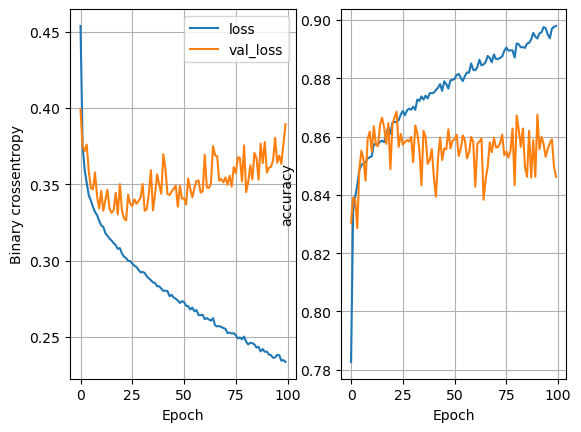

119/119 [==============================] - 0s 3ms/step - loss: 0.3894 - accuracy: 0.8462
64 modes, dropout 0, lr 0.001, batch size 128


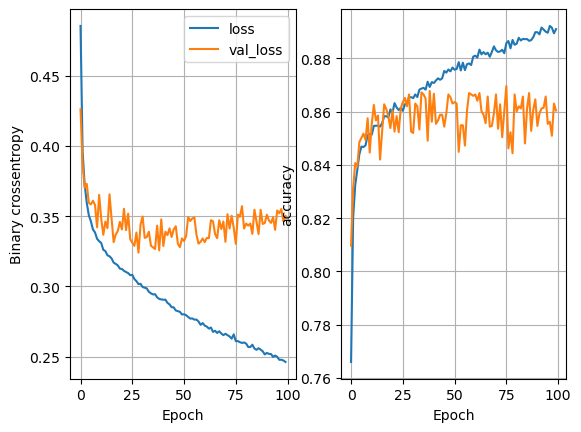

119/119 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8604
64 modes, dropout 0.2, lr 0.1, batch size 32


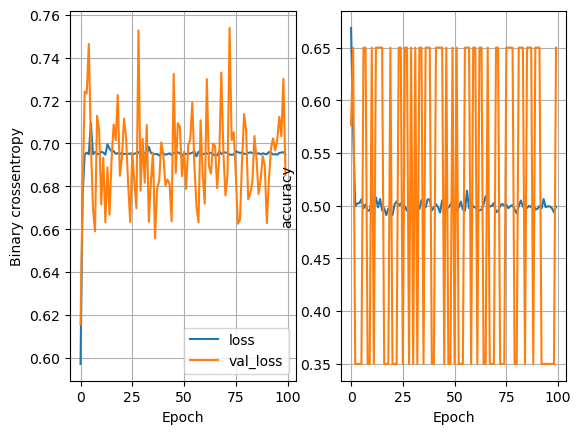

119/119 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6501
64 modes, dropout 0.2, lr 0.1, batch size 64


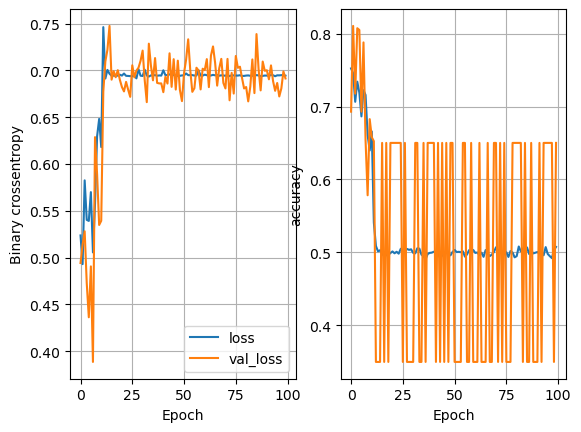

119/119 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.6501
64 modes, dropout 0.2, lr 0.1, batch size 128


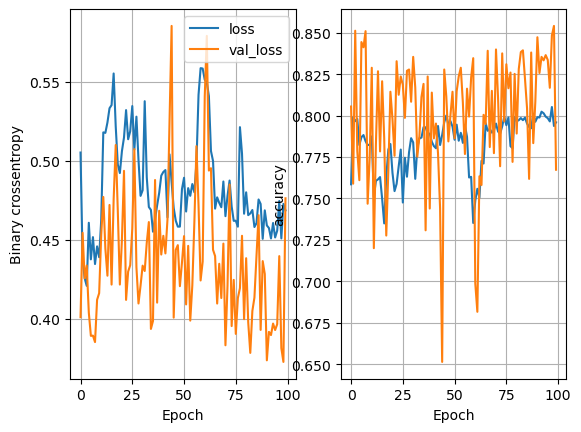

119/119 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7674
64 modes, dropout 0.2, lr 0.005, batch size 32


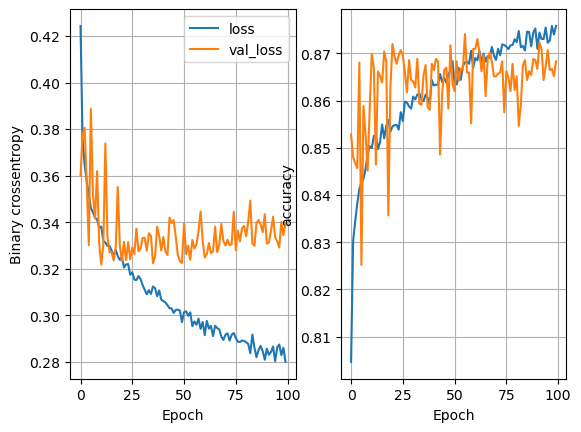

119/119 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8683
64 modes, dropout 0.2, lr 0.005, batch size 64


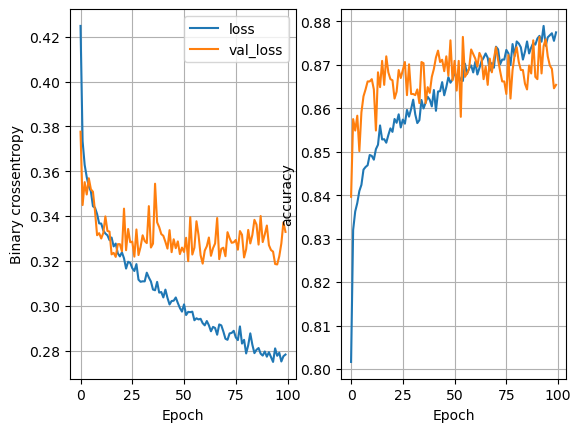

119/119 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8654
64 modes, dropout 0.2, lr 0.005, batch size 128


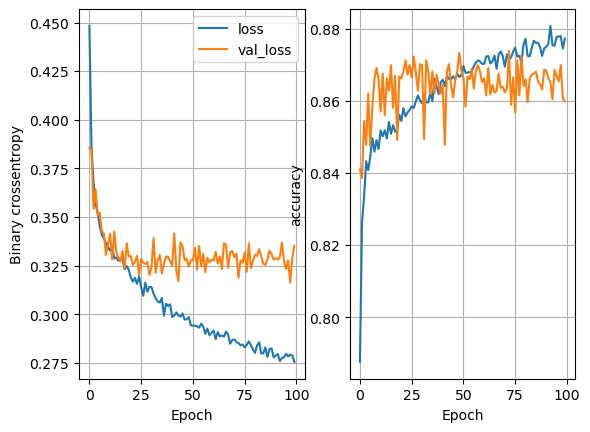

119/119 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.8599
64 modes, dropout 0.2, lr 0.001, batch size 32


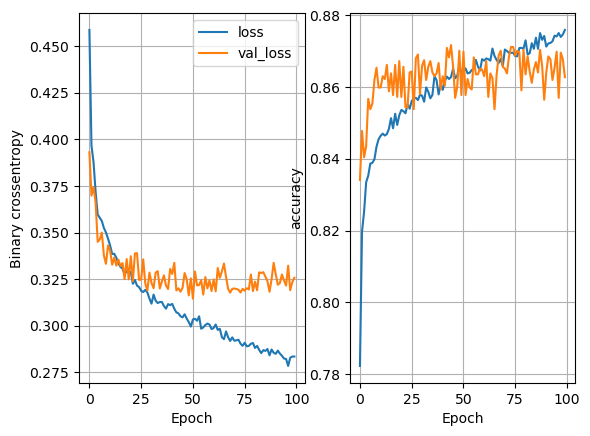

119/119 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8628
64 modes, dropout 0.2, lr 0.001, batch size 64


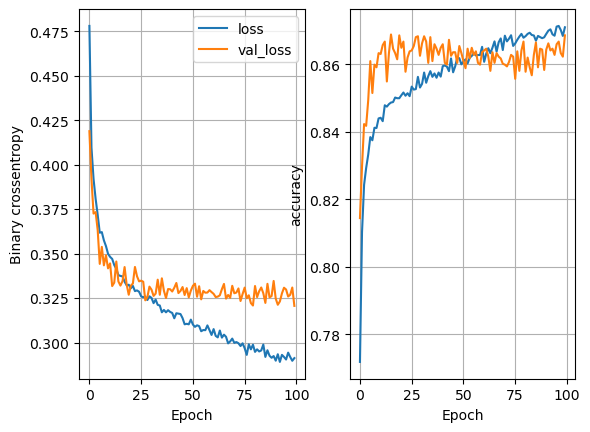

119/119 [==============================] - 0s 3ms/step - loss: 0.3206 - accuracy: 0.8686
64 modes, dropout 0.2, lr 0.001, batch size 128


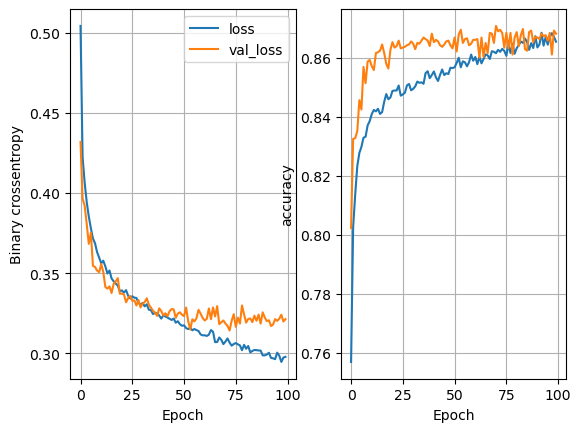

119/119 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.8683


In [104]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [ 0.1, 0.005,0.001]:
            for batch_size in [32, 64, 128]:
                print(f'{num_nodes} modes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
                model, history=train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs, X_valid, y_valid)
                plot_history(history)
                val_loss=model.evaluate(X_valid, y_valid)[0]
                if val_loss<least_val_loss:
                    least_val_loss=val_loss
                    least_loss_model=model

In [106]:
y_pred=least_loss_model.predict(X_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 3ms/step


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1365
           1       0.88      0.93      0.90      2439

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

